In [ ]:
!gdown --id 1fflAX9ZY1dICHs90ihfIahmdqI2kyDnk

Downloading...
From: https://drive.google.com/uc?id=1fflAX9ZY1dICHs90ihfIahmdqI2kyDnk
To: /content/adult.data
100% 3.97M/3.97M [00:00<00:00, 69.3MB/s]


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-31590316-ffb9-6021-93c6-e72990f54653)


In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
feature = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [ ]:
filepath = "./adult.data"
raw_data = pd.read_csv(filepath, names= feature)
raw_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
raw_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
df = raw_data

# 1.) Explore data and Cleansing data

ในส่วนนี้ได้ทำการสำรวจ และทำการ Clean ข้อมูล โดยจะมีการ Drop Row ที่มี Missing Value และ Drop Row ที่เรามองว่าเป็น Outliner ออก

## 1.1) age

In [ ]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

## 1.2) fnlwgt

In [ ]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

# 1.3) workclass

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Workclass เราพบว่ามี ' ?' ซึ่งเป็น Missing Value จึงทำการ Drop Row ที่มี ' ?'ออก

In [ ]:
df = df[df["workclass"] != ' ?']
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [ ]:
#map_list = {' State-gov': 1, ' Self-emp-not-inc': 2, ' Private': 3, ' Federal-gov': 4, ' Local-gov': 5, ' Self-emp-inc': 6, ' Without-pay': 7, ' Never-worked': 8  }

#df['workclass']=df['workclass'].map(map_list)
#df['workclass'].unique()

# 1.4) education

In [ ]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [ ]:
df['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  1,  8,  2])

Education เราเห็นว่ามี Column Education-num อยู่แล้วจึงทำการ drop column education ออก

In [ ]:
df = df.drop(['education'],axis=1)


# 1.5) marital-status

In [ ]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
#map_list = {' Never-married': 1, ' Married-civ-spouse': 2, ' Divorced': 3, ' Married-spouse-absent': 4, ' Separated': 5, ' Married-AF-spouse': 6, ' Widowed': 7}

#df['marital-status'] = df['marital-status'].map(map_list)
#df['marital-status'].unique()

## 1.6) occupation

In [ ]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' ?'], dtype=object)

พอมาสำรวจ occupation เองก็มี ' ?' จึงทำการ drop row นั้นทิ้งไป

In [ ]:
df = df[df["occupation"] != ' ?']
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
#map_list = {' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3,
#       ' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7,
#       ' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10,
#       ' Tech-support':11, ' Protective-serv':12, ' Armed-Forces':13,
#       ' Priv-house-serv':14}

#df['occupation'] = df['occupation'].map(map_list)
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

## 1.7) relationship

In [ ]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [ ]:
#map_list = {' Not-in-family': 1, ' Husband': 2, ' Wife': 3, ' Own-child': 4, ' Unmarried': 5, ' Other-relative': 6}

#df['relationship'] = df['relationship'].map(map_list)
#df['relationship'].unique()

## 1.8) race

In [ ]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
#map_list = {' White': 1, ' Black': 2, ' Asian-Pac-Islander': 3, ' Amer-Indian-Eskimo': 4, ' Other': 5}
#df['race'] = df['race'].map(map_list)
#df['race'].unique()

## 1.9) sex

In [ ]:
#df['sex'].unique()
#map_list = {' Male':0, ' Female':1}

#df['sex'] = df['sex'].map(map_list)
#df['sex'].unique()

## 1.10) capital-gain

In [ ]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  9386,
        2463,  3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,
        6514,  1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,
        6767,  2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,
        3818,   914,   401,  2829,  2977,  4934,  2062,  2354,  3464,
        5455, 15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430,
       34095,  6497,  3908,   114,  7896,  2346,  2907,  1151,  2414,
        2290,  3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086])

## 1.11) captial-loss

In [ ]:
df['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628,
       1848, 2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444,
       1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594, 3004, 2231,
       1844,  810, 2824, 2559, 2057, 1974,  974, 2174, 2149, 1735, 1258,
       2129, 2603, 2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683,
       4356, 2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754,
       2472, 1411])

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

## 1.12 Hours-per-week

In [ ]:
df['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  4, 17, 68,
        3, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

## 1.13) native-country

In [ ]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

native-country พบ ' ?' จึงทำการ Drop row นั้นออก

In [ ]:
df = df[df["native-country"] != ' ?']
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
#map_list = {' United-States': 1, ' Cuba': 2, ' Jamaica': 3, ' India': 4, ' Mexico': 5,
#       ' South': 6, ' Puerto-Rico': 7, ' Honduras': 8, ' England': 9, ' Canada': 10,
#       ' Germany': 11, ' Iran': 12, ' Philippines': 13, ' Italy': 14, ' Poland': 15,
#       ' Columbia': 16, ' Cambodia': 17, ' Thailand': 18, ' Ecuador': 19, ' Laos': 20,
#       ' Taiwan': 21, ' Haiti': 22, ' Portugal': 23, ' Dominican-Republic': 24,
#       ' El-Salvador': 25, ' France': 26, ' Guatemala': 27, ' China': 28, ' Japan': 29,
#       ' Yugoslavia': 30, ' Peru': 31, ' Outlying-US(Guam-USVI-etc)': 32, ' Scotland': 33,
#       ' Trinadad&Tobago': 34, ' Greece': 35, ' Nicaragua': 36, ' Vietnam': 37, ' Hong': 38,
#       ' Ireland': 39, ' Hungary': 40, ' Holand-Netherlands': 41}

#df['native-country'] = df['native-country'].map(map_list)
#df['native-country'].unique()

## 1.14) income

In [ ]:
#df['income'].unique()

In [ ]:
#map_list = {' <=50K': 0, ' >50K': 1}

#df['income'] = df['income'].map(map_list)
#df['income'].unique()

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2.) Plot data

ทำการ Plot กราฟ เพื่อดูหน้าตาของข้อมูลที่่เป็น Numeric

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital-gain    30162 non-null  int64 
 10  capital-loss    30162 non-null  int64 
 11  hours-per-week  30162 non-null  int64 
 12  native-country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fef3b41d0>,
      dtype=object)

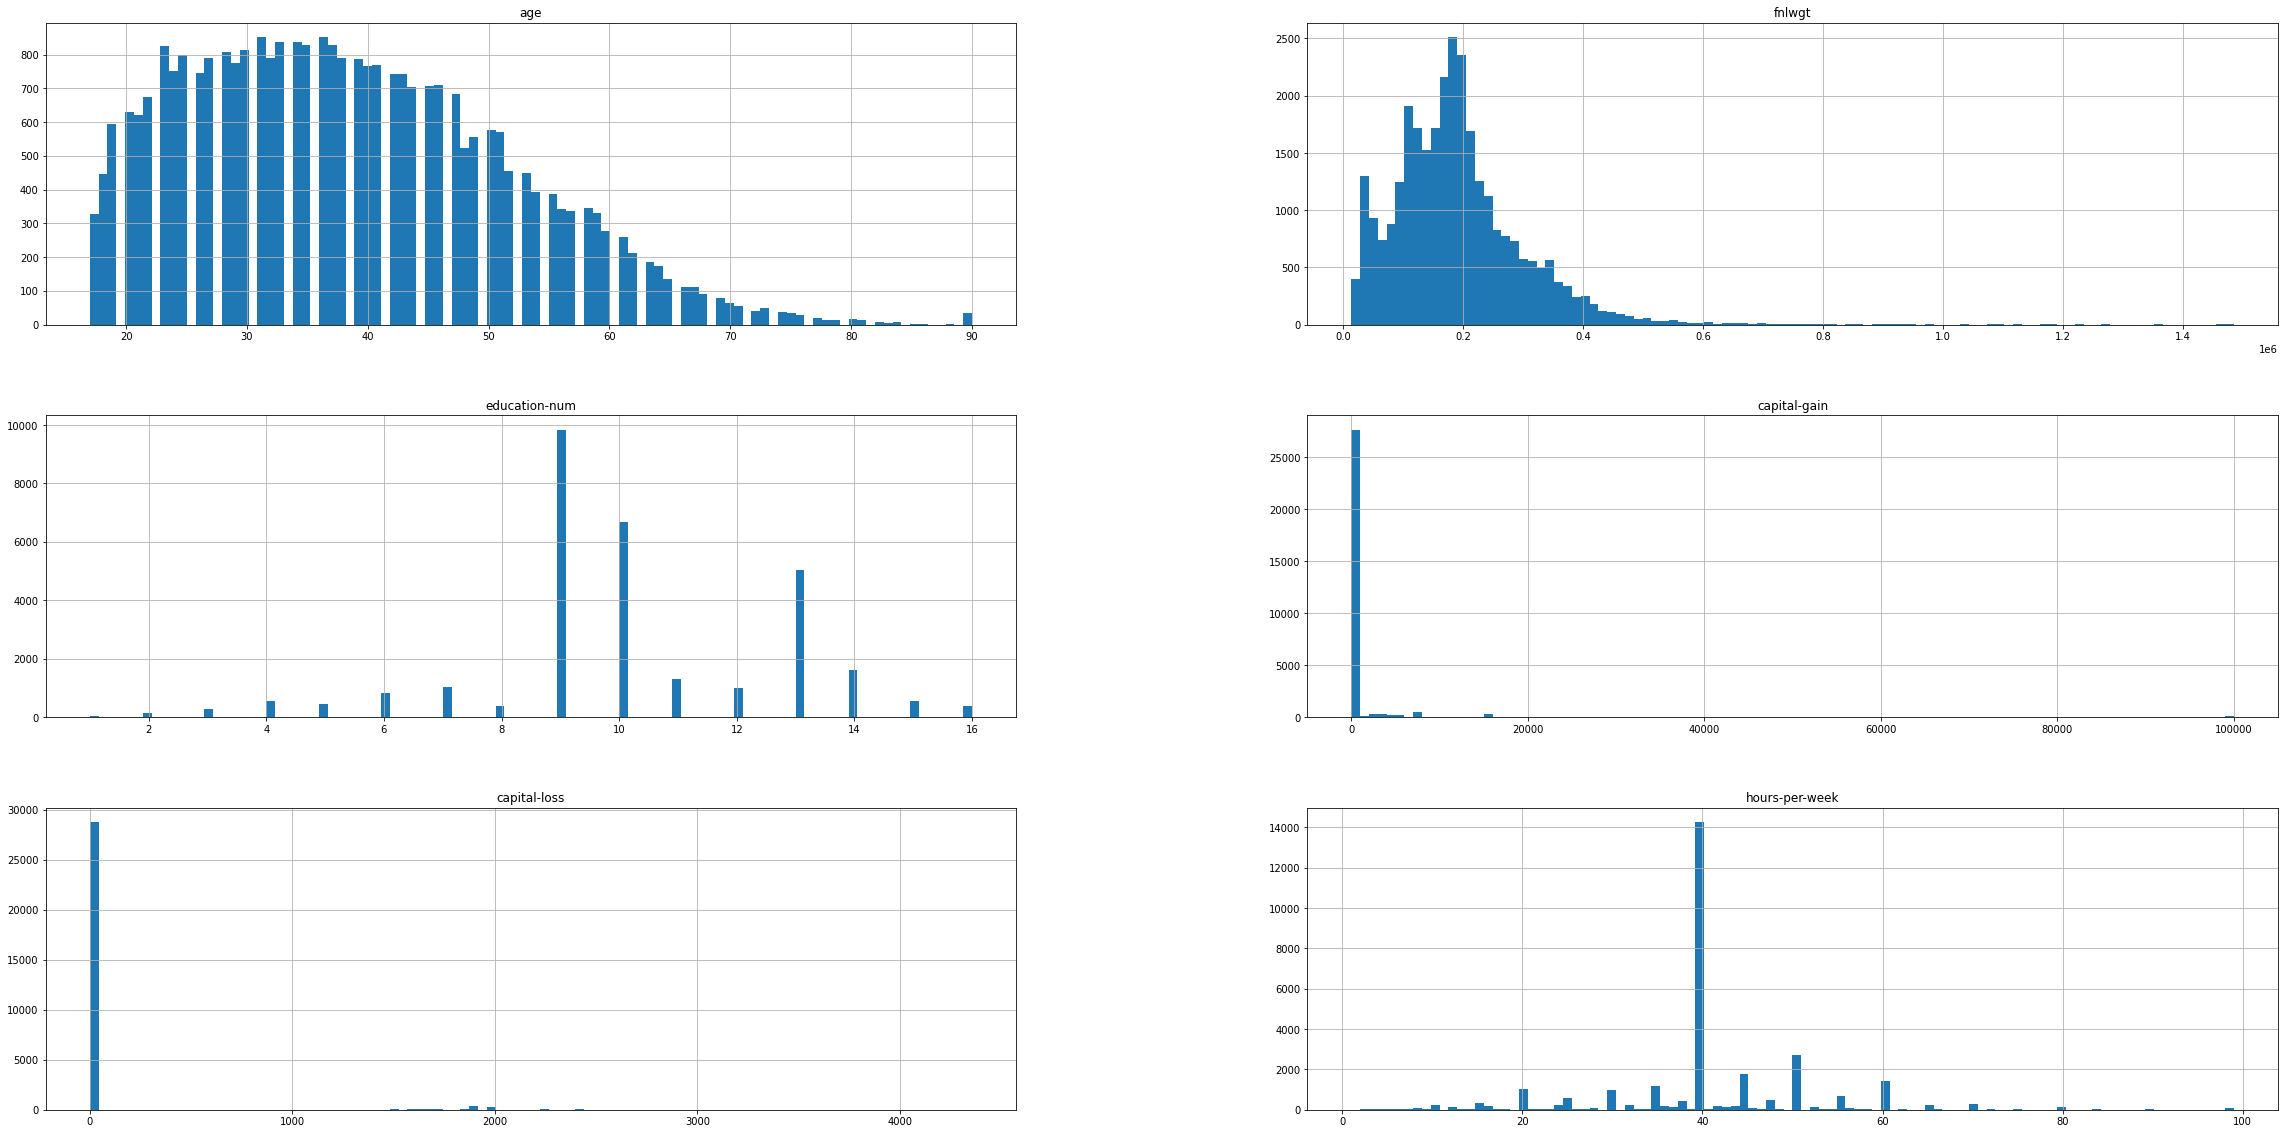

In [ ]:
df.hist(bins=100, figsize=(40,20))

จาก Info และ กราฟ เราพบว่ามี capital-gain ที่มีค่าอยู่ที่ 99999 ซึ่งเป็นตัวเลขที่แปลกและโดด เกินไป เราจึงมองว่าเป็น Outliner และทำการ drop row นั้นทิ้ง

In [ ]:
df = df[(df["capital-gain"] != 99999)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30014 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30014 non-null  int64 
 1   workclass       30014 non-null  object
 2   fnlwgt          30014 non-null  int64 
 3   education-num   30014 non-null  int64 
 4   marital-status  30014 non-null  object
 5   occupation      30014 non-null  object
 6   relationship    30014 non-null  object
 7   race            30014 non-null  object
 8   sex             30014 non-null  object
 9   capital-gain    30014 non-null  int64 
 10  capital-loss    30014 non-null  int64 
 11  hours-per-week  30014 non-null  int64 
 12  native-country  30014 non-null  object
 13  income          30014 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


ต่อมาเราได้ทำการสร้าง Dummy ขึ้นเพื่อแบ่ง Parameter ออกเป็นแต่ละ column และทำการ Normalize ข้อมูลที่อยู่ใน column นั้น

In [ ]:
#Dummy function
def make_dummy(df,features):
    for feature in features:
        dummies = pd.get_dummies(df[feature])
        df = pd.concat([df, dummies], axis='columns')
        df.drop([feature], axis='columns',inplace=True)
    return df

def normalization_feature(df,columns):
    for column in columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [ ]:
#ถ้าใช้ตัวนี้ก็ไม่มีความจำเป็นต้องแปลง class ให้เป็นเลข เพราะเป็นเลขแล้วเวลา drop มันจะ drop เลขตัวเดียวกัน
df = make_dummy(df,['workclass','marital-status','occupation','relationship','race','sex','native-country','income'])
df = normalization_feature(df, list(df.columns))


In [ ]:
df.drop([' >50K'], axis='columns',inplace=True)

df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,<=50K
0,0.301370,0.043338,0.800000,0.052626,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.452055,0.047277,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.287671,0.137244,0.533333,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.493151,0.150212,0.400000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.150685,0.220703,0.800000,0.000000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#Ram ไม่พอ
#details = ['age', 'workclass', 'fnlwgt','marital-status', 'occupation', 'relationship', 'race', 'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
#cov_df = df[details]
#covMatrix = np.cov(cov_df,bias=True)
#sn.heatmap(covMatrix, annot=True, fmt='g')
#plt.show()


# 3) Model Evaluation

เตรียม Dataset x และ y

In [ ]:
df_x = df
df_y = df[' <=50K']

y = df_y.to_numpy()
print(df_x.count())
print(df_y.count())
print(df_x.describe())

age                 30014
fnlwgt              30014
education-num       30014
capital-gain        30014
capital-loss        30014
                    ...  
 Trinadad&Tobago    30014
 United-States      30014
 Vietnam            30014
 Yugoslavia         30014
 <=50K              30014
Length: 89, dtype: int64
30014
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30014.000000  30014.000000   30014.000000  30014.000000  30014.000000   
mean       0.293147      0.119657       0.607146      0.014628      0.020388   
std        0.179925      0.071836       0.169485      0.062409      0.093032   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.070592       0.533333      0.000000      0.000000   
50%        0.273973      0.111950       0.600000      0.000000      0.000000   
75%        0.410959      0.152198       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.0

ก่อนหน้านี้เราเห็นว่า Income ซึ่งเป็นตัวที่จะทำนายมีปัญหาเรื่อง Imbalance Data

เราจึงทำการ ใช้เทคนิค SMOTE เพื่อแก้ปัญหา Imbalance Data

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(df_x,df_y)
print(x.count())
print(y.count())
print(df_x.describe())

age                 45308
fnlwgt              45308
education-num       45308
capital-gain        45308
capital-loss        45308
                    ...  
 Trinadad&Tobago    45308
 United-States      45308
 Vietnam            45308
 Yugoslavia         45308
 <=50K              45308
Length: 89, dtype: int64
45308
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30014.000000  30014.000000   30014.000000  30014.000000  30014.000000   
mean       0.293147      0.119657       0.607146      0.014628      0.020388   
std        0.179925      0.071836       0.169485      0.062409      0.093032   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.070592       0.533333      0.000000      0.000000   
50%        0.273973      0.111950       0.600000      0.000000      0.000000   
75%        0.410959      0.152198       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.0

In [ ]:
#x.hist(bins=100, figsize=(40,20))

ทำการ Normalize ตัวเลขใน df_x

In [ ]:
scaler = StandardScaler().fit(x)
x = scaler.transform(x)
print(x)

[[-0.09924901 -1.11015219  0.94505537 ... -0.04037463 -0.02522625
   1.        ]
 [ 0.79710387 -1.0520245   0.94505537 ... -0.04037463 -0.02522625
   1.        ]
 [-0.18073563  0.27538341 -0.6312935  ... -0.04037463 -0.02522625
   1.        ]
 ...
 [-0.89513898 -0.29263169  0.66193646 ... -0.04037463 -0.02522625
  -1.        ]
 [ 1.76450048 -0.45449311 -0.6312935  ... -0.04037463 -0.02522625
  -1.        ]
 [-0.13623621 -1.43442494 -0.34461253 ... -0.04037463 -0.02522625
  -1.        ]]


In [ ]:
#pd.DataFrame(x).hist(bins=100, figsize=(40,20))

## Split Test and train data

แบ่งข้อมูลออกเป็น Train และ Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31715, 89)
(31715,)
(13593, 89)
(13593,)


# Create Model

สร้าง Model โดยเริ่มจากฝั่ง Traditional ML และ MLP

Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
score = logreg.score(x_test, y_test)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")
print(f'Test Accuracy Score :{score}')
print(f'Recall :{recall_precision_f1[0]}')
print(f'Precision :{recall_precision_f1[1]}')
print(f'F1 :{recall_precision_f1[2]}')

Test Accuracy Score :1.0
Recall :1.0
Precision :1.0
F1 :1.0


SVM

In [ ]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
score = svm.score(x_test, y_test)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")

print(f'Test Accuracy Score :{score}')
print(f'Recall :{recall_precision_f1[0]}')
print(f'Precision :{recall_precision_f1[1]}')
print(f'F1 :{recall_precision_f1[2]}')

Test Accuracy Score :0.9950709924225705
Recall :0.9950973510190445
Precision :0.9950525888074128
F1 :0.9950704391965759


Random Forest

In [ ]:
rf = KNeighborsClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
score = rf.score(x_test, y_test)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")

print(f'Test Accuracy Score :{score}')
print(f'Recall :{recall_precision_f1[0]}')
print(f'Precision :{recall_precision_f1[1]}')
print(f'F1 :{recall_precision_f1[2]}')

Test Accuracy Score :0.9706466563672479
Recall :0.970642102132085
Precision :0.9706750548495136
F1 :0.970645964337036


KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
score = knn.score(x_test, y_test)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")

print(f'Test Accuracy Score :{score}')
print(f'Recall :{recall_precision_f1[0]}')
print(f'Precision :{recall_precision_f1[1]}')
print(f'F1 :{recall_precision_f1[2]}')

Test Accuracy Score :0.9706466563672479
Recall :0.970642102132085
Precision <=50k:0.9706750548495136
F1 <=50k:0.970645964337036


MLP

In [ ]:
tf.random.set_seed(1)
initializer = tf.keras.initializers.GlorotNormal(seed=9999)
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape = x_test.shape[1],))  #input
model.add(tf.keras.layers.Dense(512, activation = "sigmoid", name = "hidden1", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(256, activation = "sigmoid", name = "hidden2", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(128, activation = "sigmoid", name = "hidden3", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(64, activation = "sigmoid", name = "hidden4", kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(32, activation = "sigmoid", name = "hidden5", kernel_initializer=initializer))
model.add(tf.keras.layers.Dropout(0.3))


#Output layer
model.add(tf.keras.layers.Dense(1,activation = "sigmoid", name = "output"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 512)               46080     
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 64)                8256      
                                                                 
 hidden5 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 1)                

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ['acc',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
print(model.layers[2].get_weights()[0][0])

[ 0.13575114 -0.13093224 -0.01206048  0.06655537  0.09920499 -0.07324725
 -0.02685088  0.05199524 -0.10642366  0.0691298   0.14607278  0.04716945
  0.10319024 -0.12954776 -0.13051523  0.10656802  0.0087737   0.06259705
 -0.06671014 -0.11666407  0.04763605 -0.04898696  0.05283096  0.0433395
  0.04592669 -0.1517444   0.12093838  0.06911775 -0.03986859 -0.14373568
 -0.04388779  0.00639576 -0.07783332  0.04151439 -0.05528233  0.09245462
 -0.05303004  0.06245764 -0.07706513 -0.02181769 -0.01170241  0.00310498
 -0.00880475  0.05939907  0.14814591 -0.0682506   0.07733849 -0.00154517
  0.09493714 -0.01181956  0.00572598  0.11263338 -0.08086068 -0.00546064
  0.00116275  0.08597496  0.021769    0.0387065  -0.02512379 -0.10140079
  0.0421307  -0.06218355 -0.13355234 -0.10565452 -0.00334383  0.06068901
  0.05138321  0.13819773 -0.01879609  0.12454418  0.09002934  0.00088098
  0.0171227  -0.00778579  0.1423415  -0.05416208  0.00396287  0.0959791
 -0.08177876  0.02668415  0.08367825  0.02148249 -0.0

In [ ]:
model.layers[2].get_weights()[0].shape

(256, 128)

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.4f}_acc{val_acc: .4f}.hdf5"
model_check_point_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,
                                                                save_weight_only = True,
                                                                monitor = "val_acc",
                                                                mode = "max",
                                                                save_best_only = True,
                                                                verbose=1)

In [ ]:
history = model.fit(x_train, y_train, batch_size= 32, epochs = 100, verbose = 2, validation_split= 0.2, callbacks=[model_check_point_callback])

Epoch 1/100

Epoch 00001: val_acc improved from -inf to 0.99306, saving model to bestmodel_epoch01_valloss0.0202_acc 0.9931.hdf5
793/793 - 4s - loss: 0.0844 - acc: 0.9729 - precision_1: 0.9728 - recall_1: 0.9724 - val_loss: 0.0202 - val_acc: 0.9931 - val_precision_1: 0.9984 - val_recall_1: 0.9880 - 4s/epoch - 5ms/step
Epoch 2/100

Epoch 00002: val_acc improved from 0.99306 to 0.99732, saving model to bestmodel_epoch02_valloss0.0068_acc 0.9973.hdf5
793/793 - 3s - loss: 0.0133 - acc: 0.9965 - precision_1: 0.9958 - recall_1: 0.9971 - val_loss: 0.0068 - val_acc: 0.9973 - val_precision_1: 0.9951 - val_recall_1: 0.9997 - 3s/epoch - 4ms/step
Epoch 3/100

Epoch 00003: val_acc did not improve from 0.99732
793/793 - 3s - loss: 0.0107 - acc: 0.9970 - precision_1: 0.9965 - recall_1: 0.9974 - val_loss: 0.0076 - val_acc: 0.9964 - val_precision_1: 0.9954 - val_recall_1: 0.9975 - 3s/epoch - 4ms/step
Epoch 4/100

Epoch 00004: val_acc did not improve from 0.99732
793/793 - 3s - loss: 0.0064 - acc: 0.998

In [ ]:
#model.load_weights('bestmodel_epoch85_valloss0.3756_acc 0.8458.hdf5')
model.load_weights('bestmodel_epoch15_valloss0.0001_acc 1.0000.hdf5') #มี Dropout

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
y_pred = np.nan_to_num(y_pred)

score = accuracy_score(y_test, y_pred)
recall_precision_f1 = precision_recall_fscore_support(y_test,y_pred, average = "macro")

print(f'Test Accuracy Score :{score}')
print(f'Recall :{recall_precision_f1[0]}')
print(f'Precision :{recall_precision_f1[1]}')
print(f'F1 :{recall_precision_f1[2]}')

Test Accuracy Score :0.9997792981681748
Recall :0.9997786713003597
Precision :0.9997799048113206
F1 :0.9997792826437486


In [ ]:
print(y_pred)

[[1.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


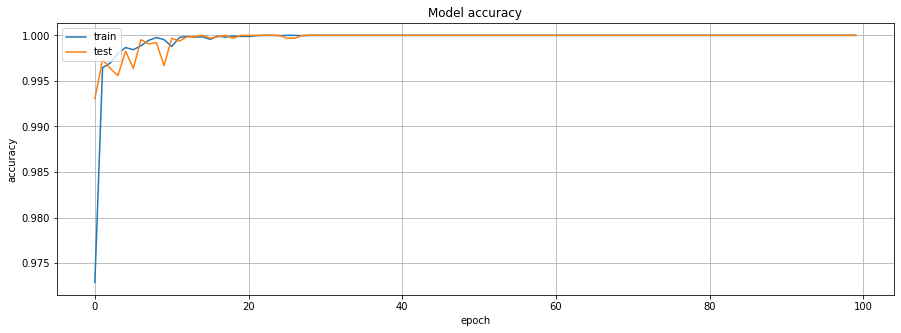

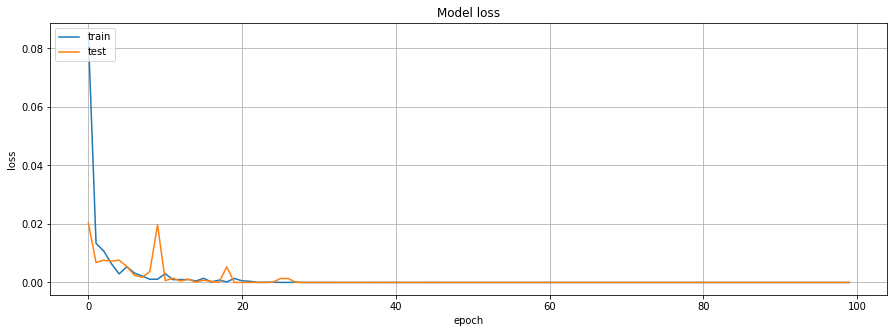

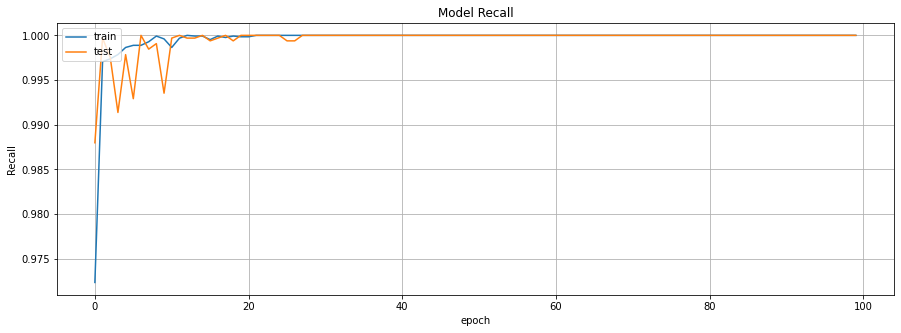

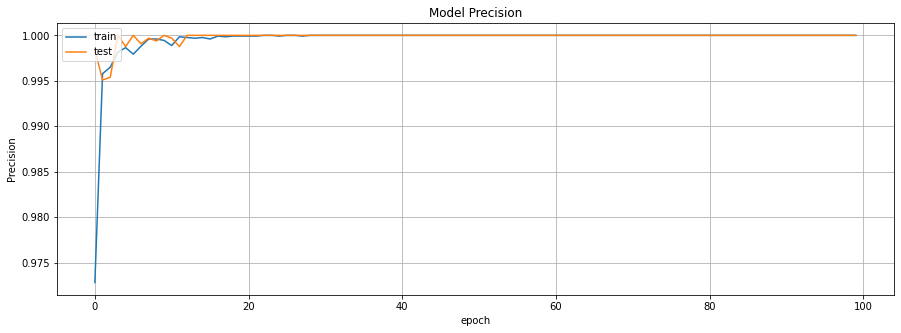

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for Recall
plt.figure(figsize=(15,5))
plt.plot(history.history['recall_1'])
plt.plot(history.history['val_recall_1'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for Precision
plt.figure(figsize=(15,5))
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Model Load

In [ ]:
#model.load_weights('bestmodel_epoch85_valloss0.3756_acc 0.8458.hdf5')
#model.load_weights('bestmodel_epoch100_valloss0.3527_acc 0.8573.hdf5')
model.load_weights('bestmodel_epoch15_valloss0.0001_acc 1.0000.hdf5')

score = []
xx = []
pred = model.predict(x_test)
for i in range(10):
  z = i/10
  xx.append(np.where(pred > z,1,0))
#print(pred)
  score.append(metrics.accuracy_score(y_test,xx[i]))
  print("Final accuracy: threshold {} --> score {}".format(z,score[i]),i)
rand = [0 for _ in range(len(y_test))]
score.append(metrics.accuracy_score(y_test,rand))
print("Final accuracy : random target --> score {}".format(score[10]))
print(i)

Final accuracy: threshold 0.0 --> score 0.5042301184433164 0
Final accuracy: threshold 0.1 --> score 0.9997792981681748 1
Final accuracy: threshold 0.2 --> score 0.9997792981681748 2
Final accuracy: threshold 0.3 --> score 0.9997792981681748 3
Final accuracy: threshold 0.4 --> score 0.9997792981681748 4
Final accuracy: threshold 0.5 --> score 0.9997792981681748 5
Final accuracy: threshold 0.6 --> score 0.9997792981681748 6
Final accuracy: threshold 0.7 --> score 0.9997792981681748 7
Final accuracy: threshold 0.8 --> score 0.9997792981681748 8
Final accuracy: threshold 0.9 --> score 0.9997057308908998 9
Final accuracy : random target --> score 0.4957698815566836
9


In [ ]:
print(pred)

[[9.9999976e-01]
 [9.9999976e-01]
 [8.9378062e-08]
 ...
 [8.7683937e-08]
 [8.7804949e-08]
 [8.7758060e-08]]


In [ ]:

r_fpr, r_tpr, _ = roc_curve(y_test,rand)
th01_fpr, th01_tpr, _ = roc_curve(y_test,xx[1])
th02_fpr, th02_tpr, _ = roc_curve(y_test,xx[2])
th03_fpr, th03_tpr, _ = roc_curve(y_test,xx[3])
th04_fpr, th04_tpr, _ = roc_curve(y_test,xx[4])
th05_fpr, th05_tpr, _ = roc_curve(y_test,xx[5])
th06_fpr, th06_tpr, _ = roc_curve(y_test,xx[6])
th07_fpr, th07_tpr, _ = roc_curve(y_test,xx[7])
th08_fpr, th08_tpr, _ = roc_curve(y_test,xx[8])
th09_fpr, th09_tpr, _ = roc_curve(y_test,xx[9])

In [ ]:
r_auc = roc_auc_score(y_test, rand)
th01_auc = roc_auc_score(y_test, xx[1])
th02_auc = roc_auc_score(y_test, xx[2])
th03_auc = roc_auc_score(y_test, xx[3])
th04_auc = roc_auc_score(y_test, xx[4])
th05_auc = roc_auc_score(y_test, xx[5])
th06_auc = roc_auc_score(y_test, xx[6])
th07_auc = roc_auc_score(y_test, xx[7])
th08_auc = roc_auc_score(y_test, xx[8])
th09_auc = roc_auc_score(y_test, xx[9])

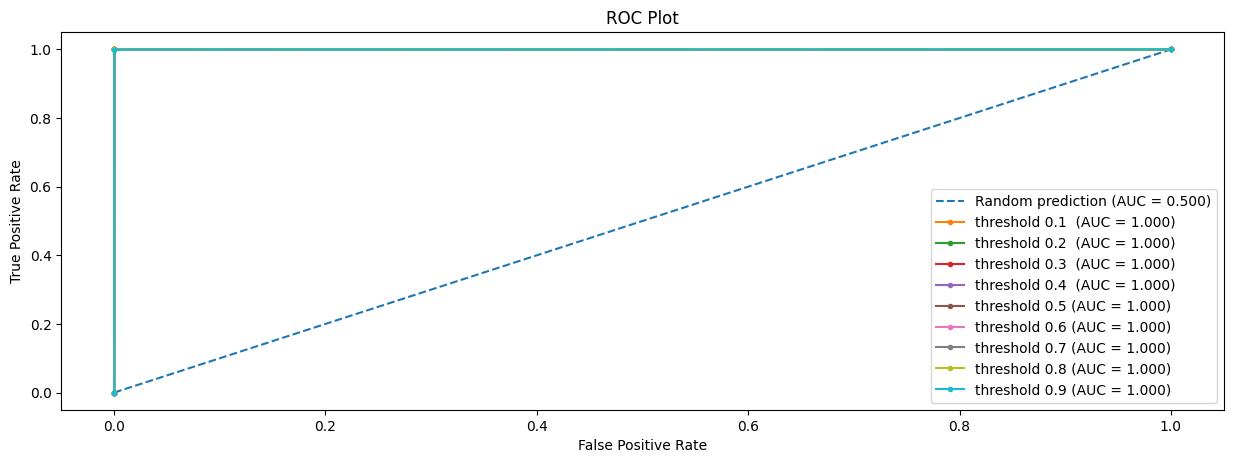

In [ ]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(th01_fpr, th01_tpr, marker='.', label='threshold 0.1  (AUC = %0.3f)' % th01_auc)
plt.plot(th02_fpr, th02_tpr, marker='.', label='threshold 0.2  (AUC = %0.3f)' % th02_auc)
plt.plot(th03_fpr, th03_tpr, marker='.', label='threshold 0.3  (AUC = %0.3f)' % th03_auc)
plt.plot(th04_fpr, th04_tpr, marker='.', label='threshold 0.4  (AUC = %0.3f)' % th04_auc)
plt.plot(th05_fpr, th05_tpr, marker='.', label='threshold 0.5 (AUC = %0.3f)' % th05_auc)
plt.plot(th06_fpr, th06_tpr, marker='.', label='threshold 0.6 (AUC = %0.3f)' % th06_auc)
plt.plot(th07_fpr, th07_tpr, marker='.', label='threshold 0.7 (AUC = %0.3f)' % th07_auc)
plt.plot(th08_fpr, th08_tpr, marker='.', label='threshold 0.8 (AUC = %0.3f)' % th08_auc)
plt.plot(th09_fpr, th09_tpr, marker='.', label='threshold 0.9 (AUC = %0.3f)' % th09_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()